In [1]:
from pathlib import Path
import sys 
base = Path().cwd().parent.parent
EXPERIMENT_DIR = base / "cluster_runs"
PLOT_DIR =  Path().cwd() / "plots"

sys.path.append(str(base / 'src'))
sys.path.append(str(base/'eval'))
from evalu import *
from visuals.eval_plots import plot_llr_violins

In [2]:
losses, subset_flags = load_test_results(EXPERIMENT_DIR / "saccade", "saccade")
# We select the folders with the best models from the validation set
len_freq_filtered = "rme_css_len_freq_filtered_2025-06-15_22-20-00-139"
len_freq_raw = "rme_css_len_freq_raw_2025-06-15_22-20-00-139"

ws_len_freq_raw = "rme_css_word_len_freq_raw_2025-06-15_22-20-00-139"
ws_len_freq_filtered = "rme_css_word_len_freq_filtered_2025-06-15_22-20-00-139"

cs_len_freq_filtered = "rme_css_char_len_freq_filtered_2025-06-15_22-20-00-139"
cs_len_freq_raw = "rme_css_char_len_freq_raw_2025-06-15_22-20-00-139"

cs_ws_len_freq_filtered = "rme_css_char_word_len_freq_filtered_2025-06-15_22-20-00-139"
cs_ws_len_freq_raw = "rme_css_char_word_len_freq_raw_2025-06-15_22-20-00-139"

cs_effect_raw_key = "rme_css_cs_raw_2025-06-15_22-20-00-139"
cs_effect_filtered_key = "rme_css_cs_filtered_2025-06-15_22-20-00-139"

ws_effect_raw_key = "rme_css_ws_raw_2025-06-16_11-39-35-632"
ws_effect_filtered_key = "rme_css_ws_filtered_2025-06-16_11-39-35-632"

duration_effect_raw_key = "rme_css_dur_raw_2025-06-07_15-44-03-767"
duration_effect_filtered_key = "rme_css_dur_filtered_2025-06-07_15-44-03-767"

len_effect_raw_key = "rme_css_len_raw_2025-06-06_05-12-54-487"
len_effect_filtered_key = "rme_css_len_filtered_2025-06-06_05-12-54-487"

freq_effect_raw_key = "rme_css_freq_raw_2025-06-15_22-10-50-335"
freq_effect_filtered_key = "rme_css_freq_filtered_2025-06-15_22-20-00-139"


css_raw_key = "css_raw_2025-06-05_12-24-38-009"
stand_hawkes_raw_key = "stand_hawkes_raw_2025-06-05_09-53-56-236"
last_fix_raw_key = "last_fix_raw_2025-06-04_19-41-29-218"
poisson_raw_key = "poisson_raw_baseline"

css_filtered_key = "css_filtered_2025-06-04_19-43-45-720"
stand_hawkes_filtered_key = "stand_hawkes_filtered_2025-06-04_19-43-11-617"
last_fix_filtered_key = "last_fix_filtered_2025-06-04_19-41-53-407"
poisson_filtered_key = "poisson_filtered_baseline"


rme_css_raw_key = "rme_css_raw_2025-06-04_19-42-36-801"
rme_css_filtered_key = "rme_css_filtered_2025-06-04_19-43-59-222"

Figure saved to /Users/francescoignaziore/Projects/fine-grained-model-reading-behaviour/eval/saccade_eval/plots/saccade_evaluation_wrt_poisson.png


(<Figure size 2700x1800 with 1 Axes>,
 <Axes: title={'center': 'Bootstrap Estimates of Log-Likelihood Gains on Test Set Across Saccade Models'}, ylabel='Delta Log-Likelihood Per Fixation w.r.t. Poisson'>)

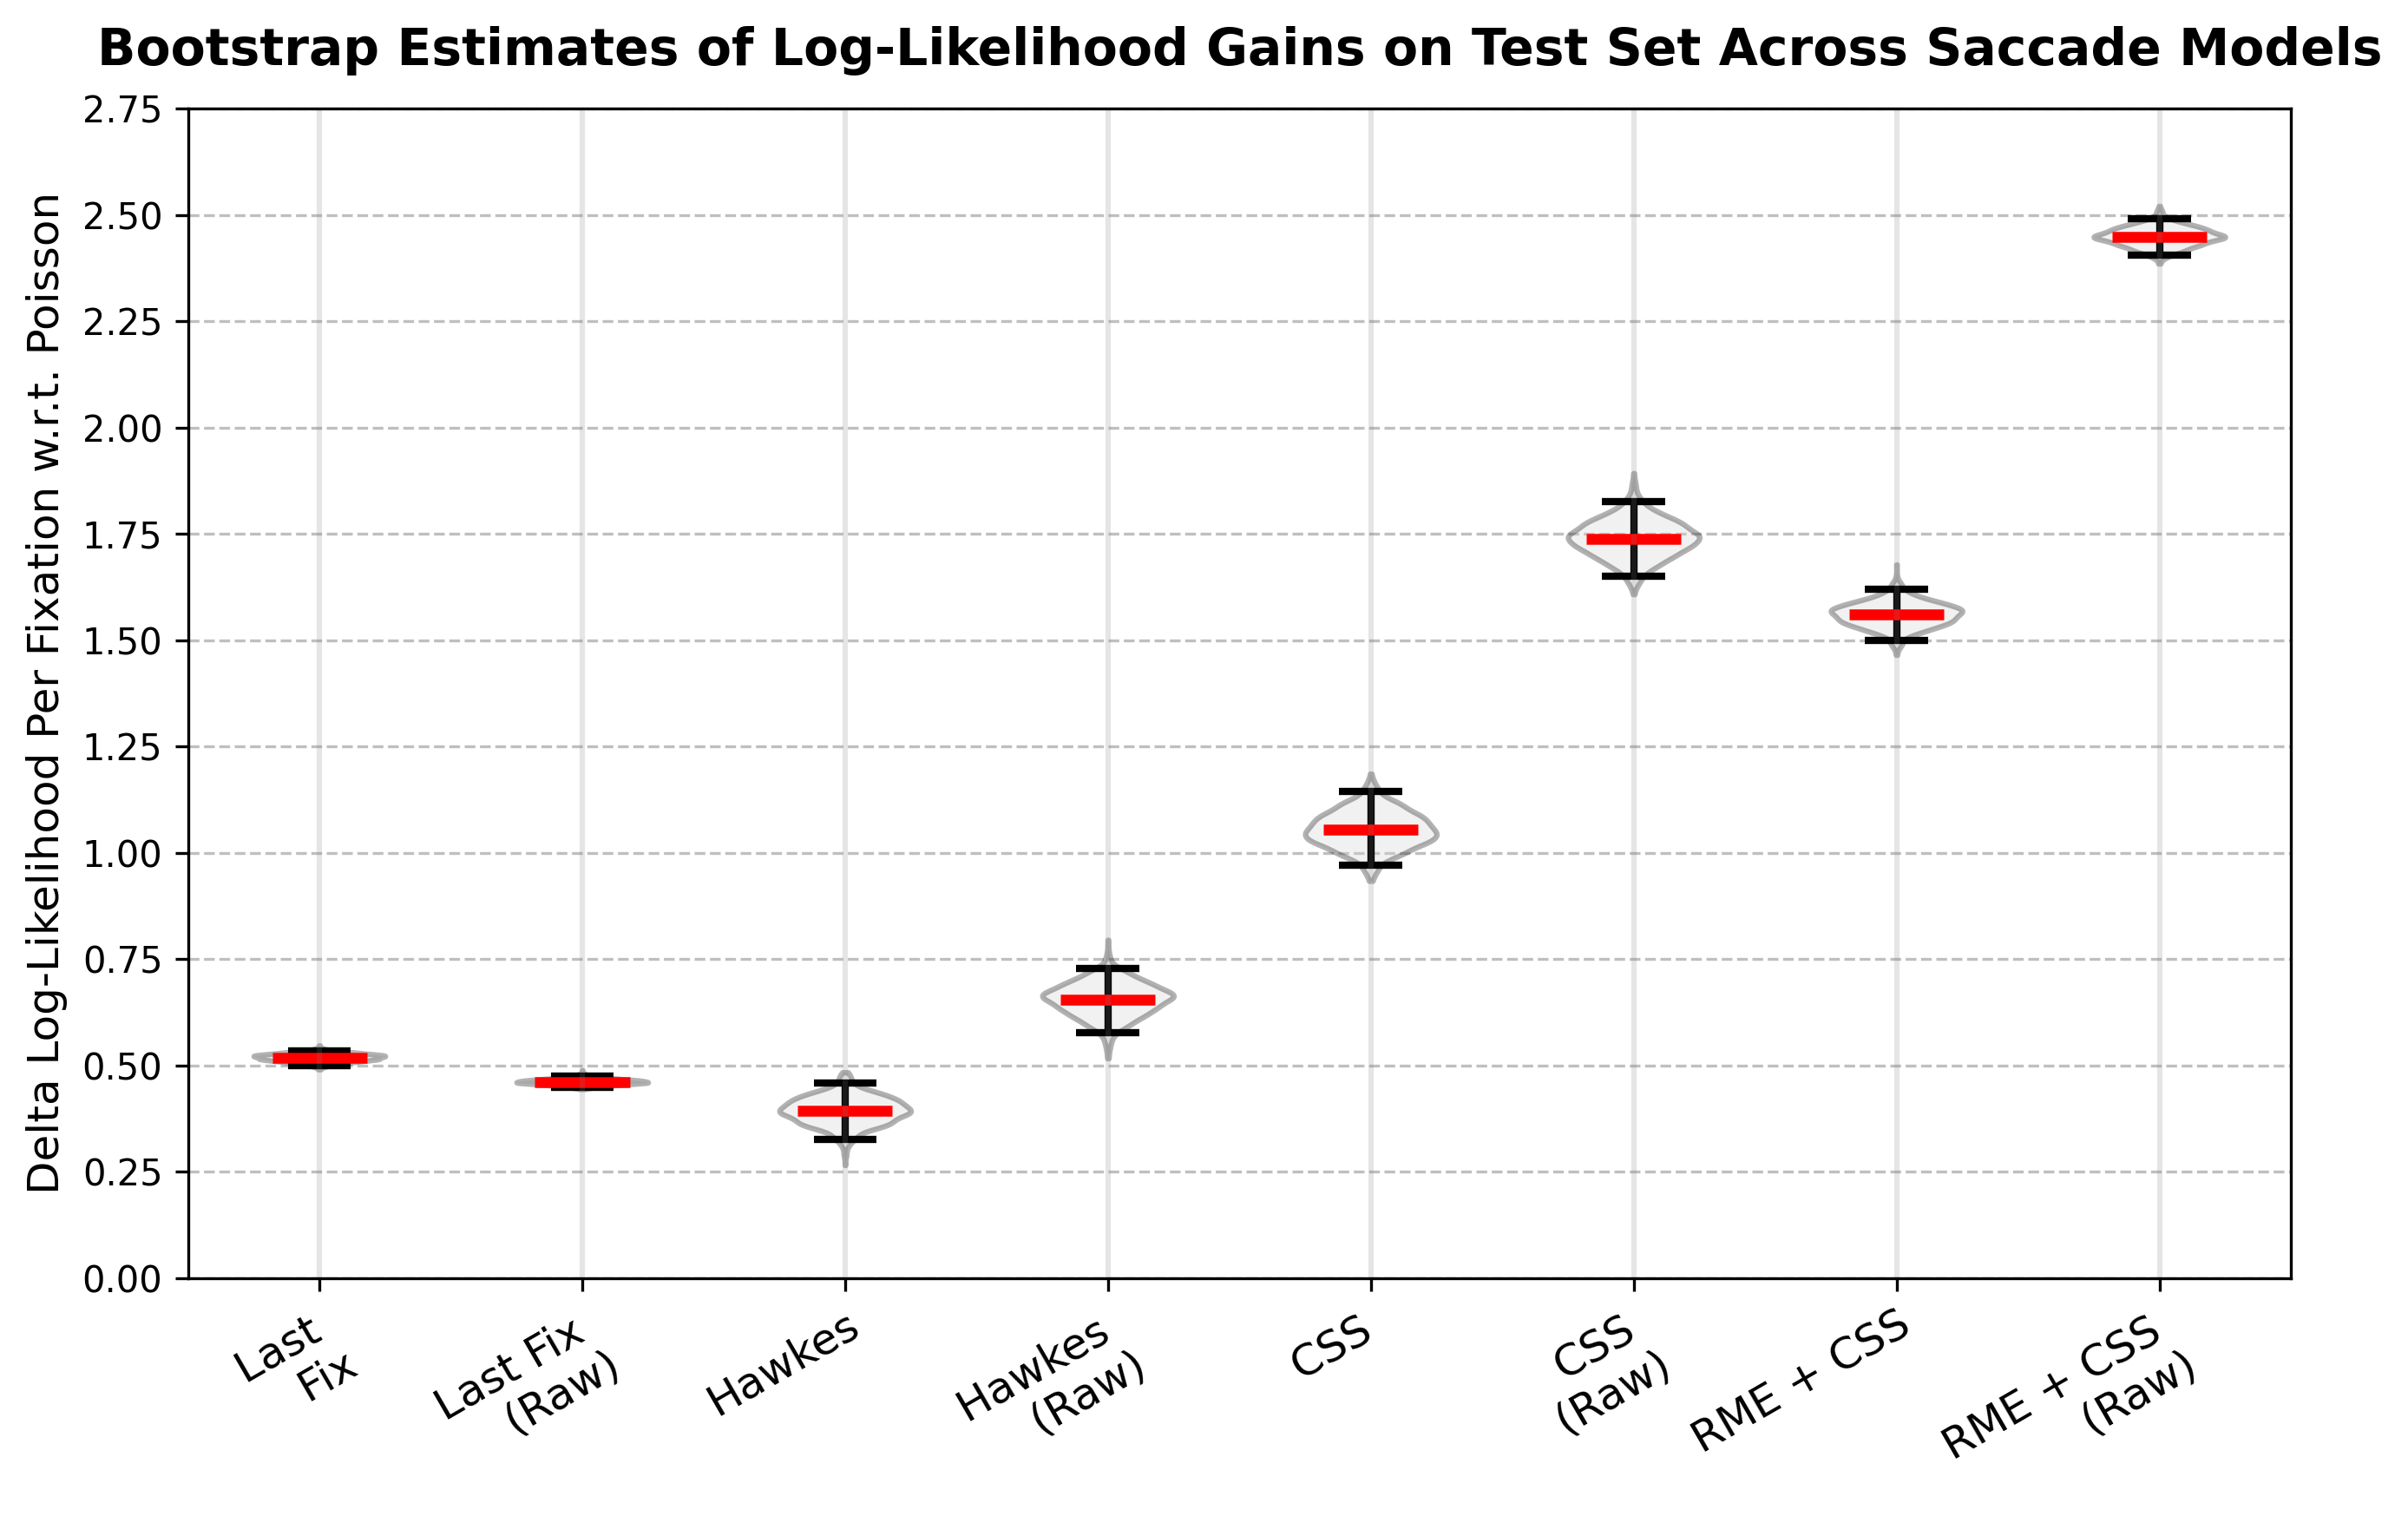

In [3]:
eff_rme_css_bstrp = bootstrap_mean_difference(
    -losses[rme_css_filtered_key],
    -losses[poisson_filtered_key],
    N=1000,
)
eff_css_bstrp = bootstrap_mean_difference(
    -losses[css_filtered_key],
    -losses[poisson_filtered_key],
    N=1000,
)
eff_lf_bstrp = bootstrap_mean_difference(
    -losses[last_fix_filtered_key],
    -losses[poisson_filtered_key],
    N=1000,
)
eff_hp_bstrp = bootstrap_mean_difference(
    -losses[stand_hawkes_filtered_key],
    -losses[poisson_filtered_key],
    N=1000,
)

eff_rme_css_bstrp_raw = bootstrap_mean_difference(
    -losses[rme_css_raw_key], -losses[poisson_raw_key], N=1000, reduce=True
)
eff_css_bstrp_raw = bootstrap_mean_difference(
    -losses[css_raw_key], -losses[poisson_raw_key], N=1000, reduce=True
)
eff_lf_bstrp_raw = bootstrap_mean_difference(
    -losses[last_fix_raw_key], -losses[poisson_raw_key], N=1000, reduce=True
)
eff_hp_bstrp_raw = bootstrap_mean_difference(
    -losses[stand_hawkes_raw_key], -losses[poisson_raw_key], N=1000, reduce=True
)

plot_llr_violins(
    [
        eff_lf_bstrp,
        eff_lf_bstrp_raw,
        eff_hp_bstrp,
        eff_hp_bstrp_raw,
        eff_css_bstrp,
        eff_css_bstrp_raw,
        eff_rme_css_bstrp,
        eff_rme_css_bstrp_raw,
    ],
    labels=[
        "Last \n Fix",
        "Last Fix \n (Raw)",
        "Hawkes",
        "Hawkes \n (Raw)",
        "CSS ",
        "CSS \n (Raw)",
        "RME + CSS",
        "RME + CSS \n (Raw)",
    ],
    title="Bootstrap Estimates of Log-Likelihood Gains on Test Set Across Saccade Models",
    y_label="Delta Log-Likelihood Per Fixation w.r.t. Poisson",
    save_path=PLOT_DIR / "saccade_evaluation_wrt_poisson.png",
    fig_size=(9, 6),
)

In [4]:
eff_dur_raw = bootstrap_mean_difference(
    -losses[duration_effect_raw_key], -losses[rme_css_raw_key], N=1000, reduce=True
)
eff_cs_raw = bootstrap_mean_difference(
    -losses[cs_effect_raw_key], -losses[rme_css_raw_key], N=1000, reduce=True
)
eff_ws_raw = bootstrap_mean_difference(
    -losses[ws_effect_raw_key], -losses[rme_css_raw_key], N=1000, reduce=True
)
eff_len_raw = bootstrap_mean_difference(
    -losses[len_effect_raw_key], -losses[rme_css_raw_key], N=1000, reduce=True
)
eff_freq_raw = bootstrap_mean_difference(
    -losses[freq_effect_raw_key], -losses[rme_css_raw_key], N=1000, reduce=True
)

eff_dur_filtered = bootstrap_mean_difference(
    -losses[duration_effect_filtered_key],
    -losses[rme_css_filtered_key],
    N=1000,
)
eff_cs_filtered = bootstrap_mean_difference(
    -losses[cs_effect_filtered_key],
    -losses[rme_css_filtered_key],
    N=1000,
)
eff_ws_filtered = bootstrap_mean_difference(
    -losses[ws_effect_filtered_key],
    -losses[rme_css_filtered_key],
    N=1000,
)
eff_len_filtered = bootstrap_mean_difference(
    -losses[len_effect_filtered_key],
    -losses[rme_css_filtered_key],
    N=1000,
)
eff_freq_filtered = bootstrap_mean_difference(
    -losses[freq_effect_filtered_key],
    -losses[rme_css_filtered_key],
    N=1000,
)

eff_len_freq_filtered = bootstrap_mean_difference(
    -losses[len_freq_filtered], -losses[rme_css_filtered_key], N=1000, reduce=True
)
eff_len_freq_raw = bootstrap_mean_difference(
    -losses[len_freq_raw], -losses[rme_css_raw_key], N=1000, reduce=True
)
eff_ws_len_freq_filtered = bootstrap_mean_difference(
    -losses[ws_len_freq_filtered], -losses[rme_css_filtered_key], N=1000, reduce=True
)
eff_ws_len_freq_raw = bootstrap_mean_difference(
    -losses[ws_len_freq_raw], -losses[rme_css_raw_key], N=1000, reduce=True
)
eff_cs_len_freq_filtered = bootstrap_mean_difference(
    -losses[cs_len_freq_filtered], -losses[rme_css_filtered_key], N=1000, reduce=True
)
eff_cs_len_freq_raw = bootstrap_mean_difference(
    -losses[cs_len_freq_raw], -losses[rme_css_raw_key], N=1000, reduce=True
)
eff_cs_ws_len_freq_filtered = bootstrap_mean_difference(
    -losses[cs_ws_len_freq_filtered], -losses[rme_css_filtered_key], N=1000, reduce=True
)
eff_cs_ws_len_freq_raw = bootstrap_mean_difference(
    -losses[cs_ws_len_freq_raw], -losses[rme_css_raw_key], N=1000, reduce=True
)
plot_llr_violins(
    [
        eff_dur_filtered,
        eff_dur_raw,
        eff_cs_filtered,
        eff_cs_raw,
        eff_ws_filtered,
        eff_ws_raw,
        eff_freq_filtered,
        eff_freq_raw,
        eff_len_filtered,
        eff_len_raw,
        eff_len_freq_filtered,
        eff_len_freq_raw,
        eff_ws_len_freq_filtered,
        eff_ws_len_freq_raw,
        eff_cs_len_freq_filtered,
        eff_cs_len_freq_raw,
        eff_cs_ws_len_freq_filtered,
        eff_cs_ws_len_freq_raw,
    ],
    labels=[
        "Duration",
        "Duration",
        "Char \n Surp",
        "Char \n Surp",
        "Word \n Surp",
        "Word \n Surp",
        " Freq",
        " Freq",
        "Length",
        "Length",
        "Len + Freq",
        "Len + Freq",
        "WS Len + Freq",
        "WS Len + Freq",
        "CS Len + Freq",
        "CS Len + Freq",
        "CS WS Len + Freq",
        "CS WS Len + Freq",
    ],
    title="Bootstrap Estimates of Log-Likelihood Gains on Test Set Across Saccade Models (Extended)",
    y_label="Delta Log-Likelihood Per Fixation w.r.t. RSE model",
    save_path=PLOT_DIR / "saccade_evaluation_wrt_rse_extended.png",
    fig_size=(10, 6),
    step=0.02,
    dpi=1200,
)

Figure saved to /Users/francescoignaziore/Projects/fine-grained-model-reading-behaviour/eval/saccade_eval/plots/saccade_evaluation_wrt_rse_extended.png


(<Figure size 12000x7200 with 1 Axes>,
 <Axes: title={'center': 'Bootstrap Estimates of Log-Likelihood Gains on Test Set Across Saccade Models (Extended)'}, ylabel='Delta Log-Likelihood Per Fixation w.r.t. RSE model'>)

Figure saved to /Users/francescoignaziore/Projects/fine-grained-model-reading-behaviour/eval/saccade_eval/plots/saccade_evaluation_wrt_rse_full_scanpath.png


(<Figure size 5000x6000 with 1 Axes>,
 <Axes: title={'center': 'Bootstrap Estimates of Log-Likelihood Gains \n on Test Set Across Saccade Models'}, ylabel='Delta Log-Likelihood Per Fixation w.r.t. RSE Model'>)

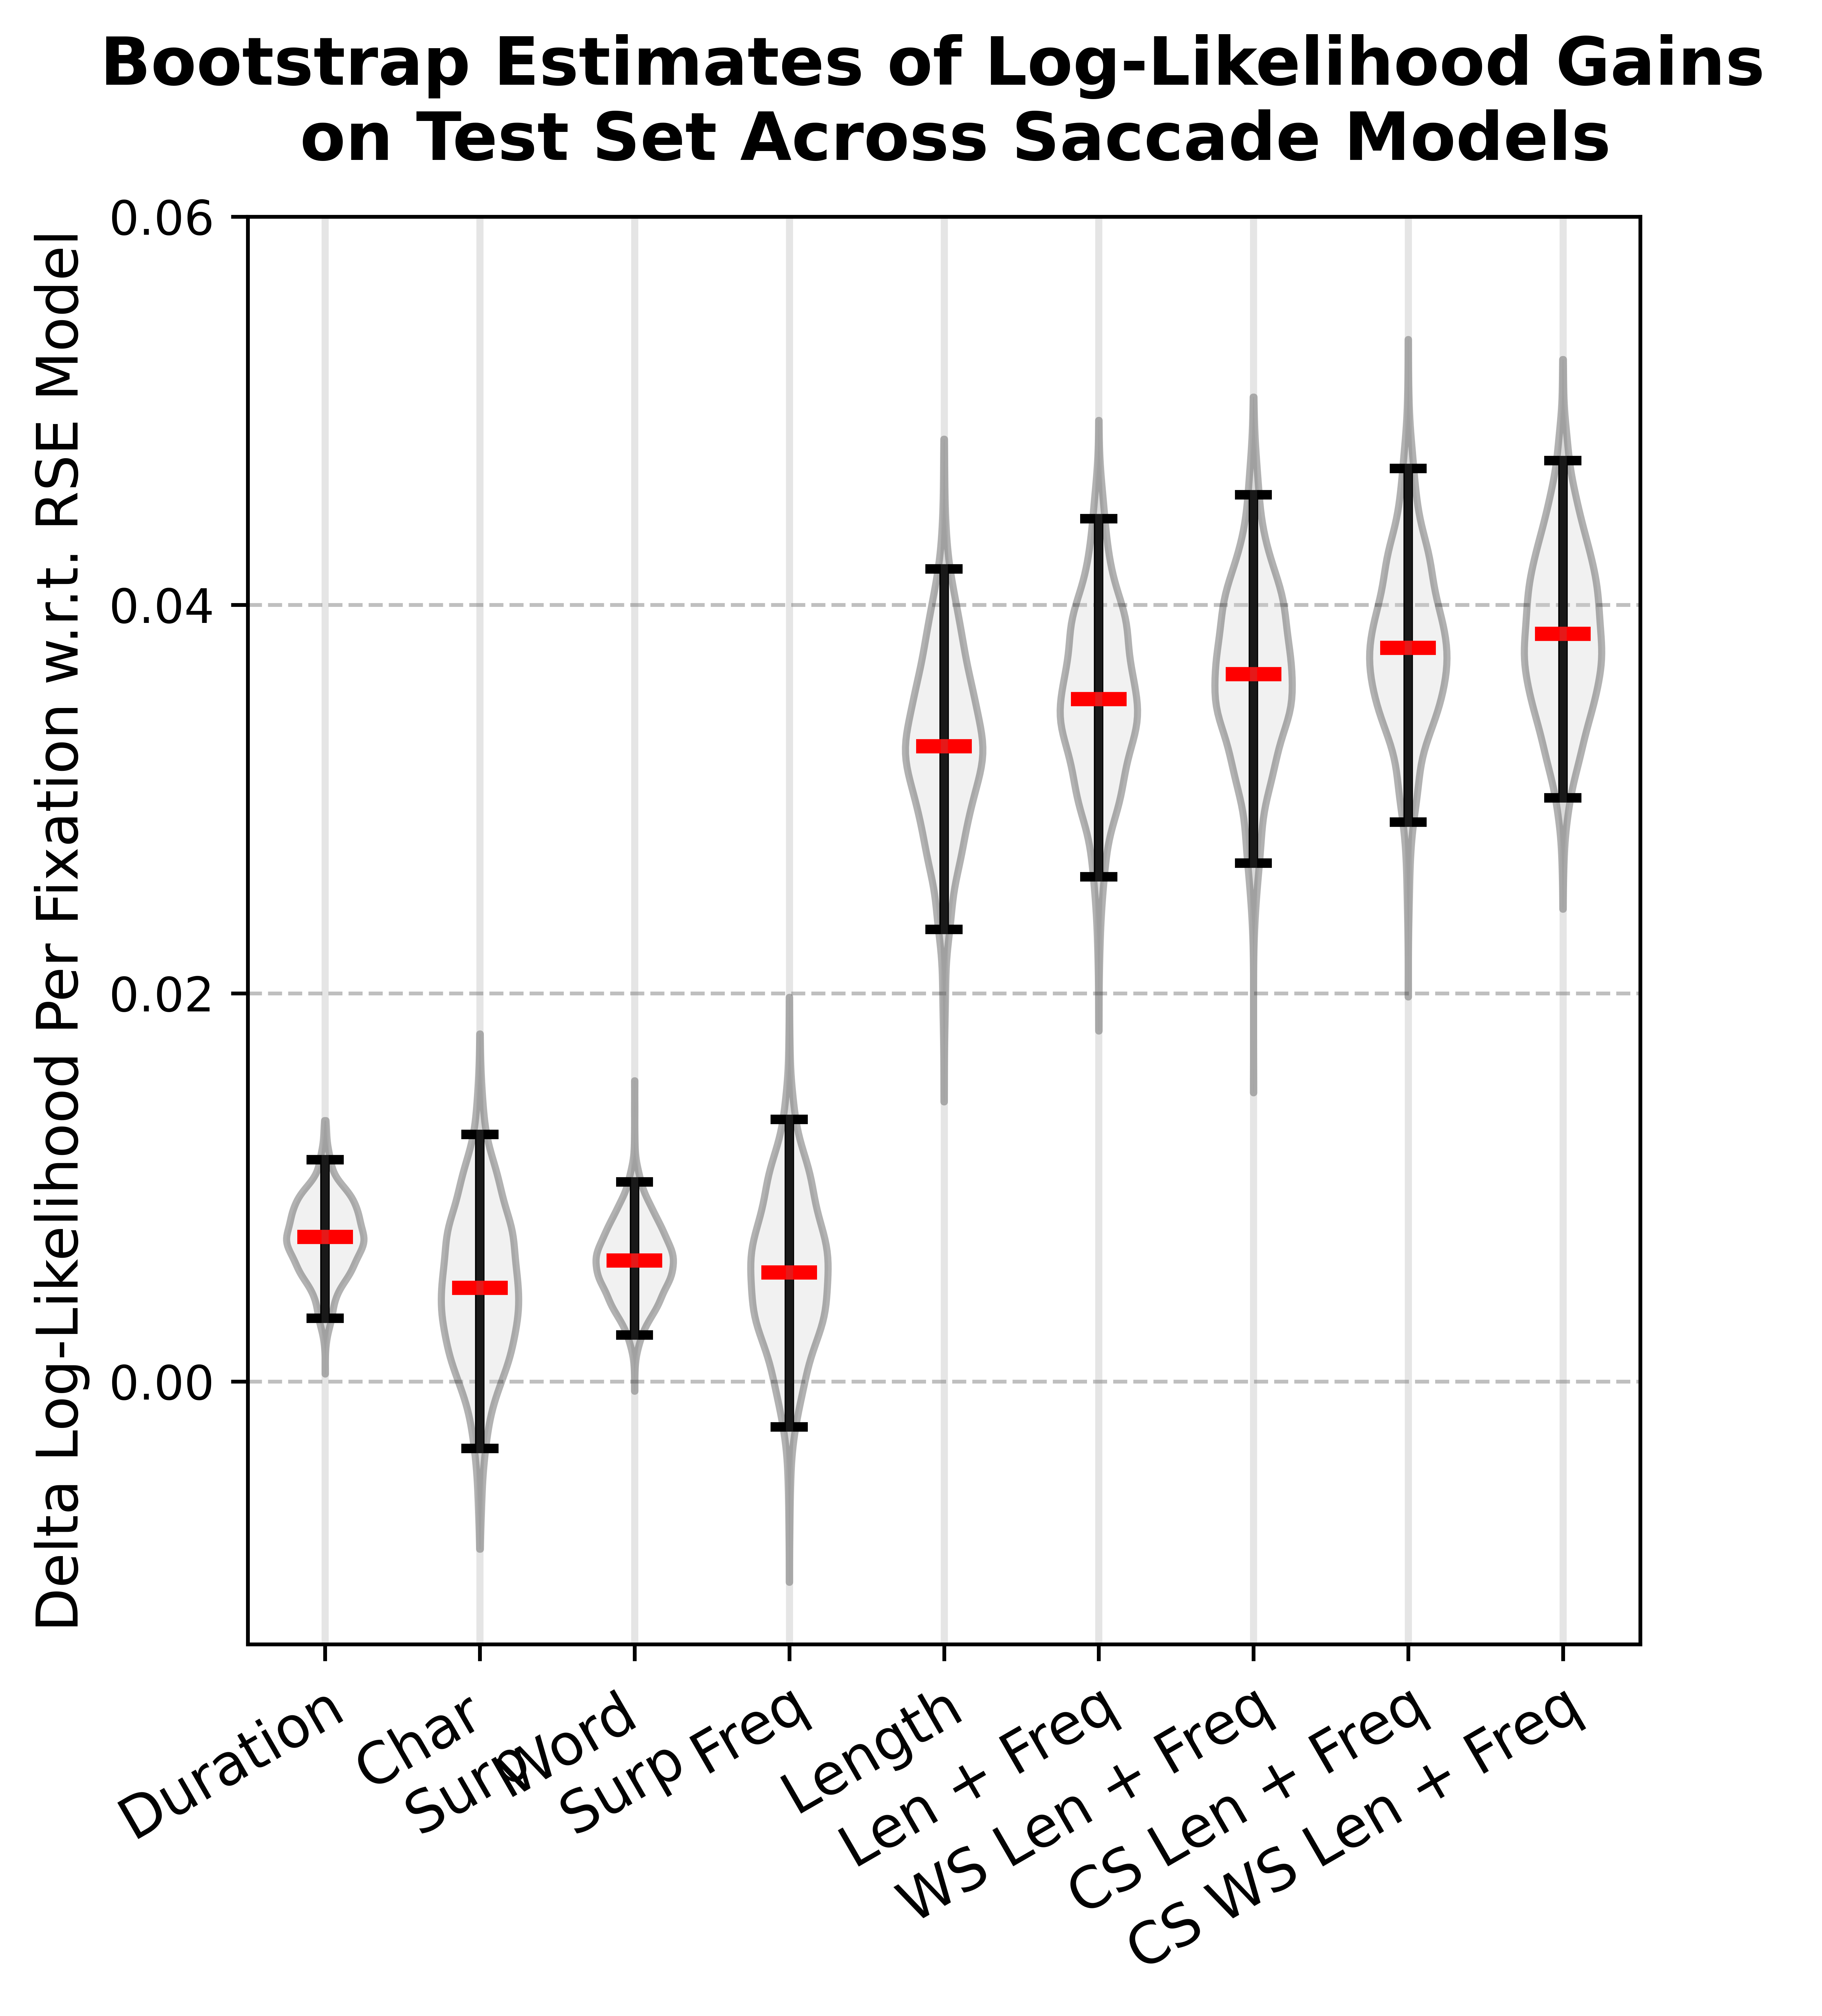

In [5]:
plot_llr_violins(
    [
        eff_dur_raw,
        eff_cs_raw,
        eff_ws_raw,
        eff_freq_raw,
        eff_len_raw,
        eff_len_freq_raw,
        eff_ws_len_freq_raw,
        eff_cs_len_freq_raw,
        eff_cs_ws_len_freq_raw,
    ],
    labels=[
        "Duration",
        "Char \n Surp",
        "Word \n Surp",
        " Freq",
        "Length",
        "Len + Freq",
        "WS Len + Freq",
        "CS Len + Freq",
        "CS WS Len + Freq",
    ],
    title="Bootstrap Estimates of Log-Likelihood Gains \n on Test Set Across Saccade Models",
    y_label="Delta Log-Likelihood Per Fixation w.r.t. RSE Model",
    save_path=PLOT_DIR / "saccade_evaluation_wrt_rse_full_scanpath.png",
    fig_size=(5, 6),
    step=0.02,
    dpi=1000,
)